In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("molnet_bace.csv")
data.head(3)

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,BACE_1,1,Train,9.154901,431.56979,4.4014,3,2,5,...,53.205711,78.640335,226.85541,107.43491,37.133846,0.000000,7.980170,0.0,0.000000,1
1,Fc1cc(cc(F)c1)C[C@H](NC(=O)[C@@H](N1CC[C@](NC(...,BACE_2,1,Train,8.853872,657.81073,2.6412,5,4,16,...,73.817162,47.171600,365.67694,174.07675,34.923889,7.980170,24.148668,0.0,24.663788,2
2,S1(=O)(=O)N(c2cc(cc3c2n(cc3CC)CC1)C(=O)N[C@H](...,BACE_3,1,Train,8.698970,591.74091,2.5499,4,3,11,...,70.365707,47.941147,192.40652,255.75255,23.654478,0.230159,15.879790,0.0,24.663788,3


,mol,Molecule
0,O1CC[C@@H](NC(=O)[C@@H](Cc2cc3cc(ccc3nc2N)-c2c...,

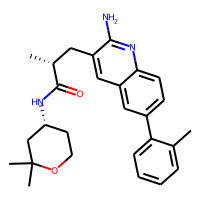

In [3]:
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem
PandasTools.AddMoleculeColumnToFrame(data,'mol','Molecule')
data[["mol","Molecule"]].head(1)

In [4]:
def mol2fp(mol):
    fp = AllChem.GetHashedMorganFingerprint(mol, 2, nBits=4096)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)
    return ar

In [5]:
data["FPs"] = data.Molecule.apply(mol2fp)

In [6]:
X = np.stack(data.FPs.values)
print(X.shape)

(1513, 4096)


In [13]:
y = data.pIC50.values.reshape((-1,1))
y

array([[9.1549015],
       [8.8538723],
       [8.6989698],
       ...,
       [2.9531147],
       [2.7332981],
       [2.5445461]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10, random_state=42)

In [20]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,  test_size=0.05, random_state=42)

In [24]:
y_train

array([[8.2006598],
       [7.6020598],
       [7.25     ],
       ...,
       [7.9208188],
       [8.       ],
       [8.6989698]])

In [26]:
y_validation

array([[7.8860564],
       [7.4814858],
       [7.3279023],
       [3.6289322],
       [7.4685211],
       [7.3979402],
       [7.1135092],
       [4.4202166],
       [8.6989698],
       [6.821023 ],
       [7.4685211],
       [4.6458917],
       [7.3899999],
       [8.0969105],
       [9.       ],
       [4.5331326],
       [7.0409584],
       [6.5559554],
       [4.9956784],
       [8.       ],
       [5.7495799],
       [7.1191864],
       [4.8860564],
       [6.5376019],
       [6.6382723],
       [6.2146702],
       [8.5086384],
       [7.7447276],
       [7.7695513],
       [8.3979397],
       [6.3872161],
       [7.6020598],
       [7.1307683],
       [6.9065785],
       [5.0506101],
       [5.8153086],
       [6.8860564],
       [7.7212462],
       [6.6497521],
       [5.       ],
       [8.1549015],
       [7.09691  ],
       [6.8239088],
       [7.6989698],
       [7.2291479],
       [7.0604806],
       [8.       ],
       [4.067019 ],
       [6.1739254],
       [6.2596374],


In [27]:
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)

In [28]:
y_train

array([[1.26465542],
       [0.81909921],
       [0.55705037],
       ...,
       [1.05636124],
       [1.11529822],
       [1.63556274]])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = data.pIC50.values.reshape((-1,1))
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.10, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,  test_size=0.05, random_state=42)
#Normalizing output using standard scaling
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)
y_validation = scaler.transform(y_validation)

In [29]:
from sklearn.feature_selection import VarianceThreshold
feature_select = VarianceThreshold(threshold=0.05)

In [30]:
X_train = feature_select.fit_transform(X_train)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [35]:
X_test.shape

(152, 4096)

In [36]:
X_test = feature_select.transform(X_test)
X_test.shape

(152, 275)

In [37]:
from sklearn.feature_selection import VarianceThreshold
feature_select = VarianceThreshold(threshold=0.05)
X_train = feature_select.fit_transform(X_train)
X_validation = feature_select.transform(X_validation)
X_test = feature_select.transform(X_test)
X_train.shape

(1292, 275)

In [38]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [39]:
X_train = torch.tensor(X_train, device=device).float()
X_test = torch.tensor(X_test, device=device).float()
X_validation = torch.tensor(X_validation, device=device).float()

In [42]:
X_train

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [43]:
y_train = torch.tensor(y_train, device=device).float()
y_test = torch.tensor(y_test, device=device).float()
y_validation = torch.tensor(y_validation, device=device).float()

In [44]:
y_train

tensor([[1.2647],
        [0.8191],
        [0.5571],
        ...,
        [1.0564],
        [1.1153],
        [1.6356]])

In [45]:
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(X_train, y_train)

In [48]:
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(X_train, y_train)
validation_dataset = TensorDataset(X_validation, y_validation)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=256,
                                          shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset,
                                          batch_size=256,
                                          shuffle=False)

In [49]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, dropout_rate, out_size):
        super(Net, self).__init__()
        # Three layers and a output layer
        self.fc1 = nn.Linear(input_size, hidden_size)  # 1st Full-Connected Layer
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc_out = nn.Linear(hidden_size, out_size) # Output layer
        #Layer normalization for faster training
        self.ln1 = nn.LayerNorm(hidden_size)
        self.ln2 = nn.LayerNorm(hidden_size)
        self.ln3 = nn.LayerNorm(hidden_size)        
        #LeakyReLU will be used as the activation function
        self.activation = nn.LeakyReLU()
        #Dropout for regularization
        self.dropout = nn.Dropout(dropout_rate)
     
    def forward(self, x):# Forward pass: stacking each layer together
        # Fully connected =&amp;gt; Layer Norm =&amp;gt; LeakyReLU =&amp;gt; Dropout times 3
        out = self.fc1(x)
        out = self.ln1(out)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.ln2(out)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.fc3(out)
        out = self.ln3(out)
        out = self.activation(out)
        out = self.dropout(out)
        #Final output layer
        out = self.fc_out(out)
        return out

In [50]:
#Defining the hyperparameters
input_size = X_train.size()[-1]     # The input size should fit our fingerprint size
hidden_size = 1024   # The size of the hidden layer
dropout_rate = 0.80    # The dropout rate
output_size = 1        # This is just a single task, so this will be one
learning_rate = 0.001  # The learning rate for the optimizer
model = Net(input_size, hidden_size, dropout_rate, output_size)